In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Cleaning

In [6]:
# Data source: https://data.winnipeg.ca/Contact-Centre-311/311-Service-Request/4her-3th5
DF = pd.read_csv("./assets/311_Service_Request.csv")
DF.drop(["Zip Codes", "Location 1", "Wards", "Neighborhoods", "Electoral Ward 2018"], axis=1, inplace=True)
DF
# DF.any(DF["Ward"] == "St. Vital" and )

,Date,Service Area,Service Request,Ward,Neighbourhood,Point
0,"March 28, 2021 12:35 PM",Animal Services,Dog Complaint,St. Vital,Royalwood,POINT (-97.076854696327 49.838635331186)
1,"February 11, 2022 05:47 PM",Water,Water Main Leak,Mynarski,Luxton,POINT (-97.119735644628 49.921935425852)
2,"June 15, 2022 02:54 PM",Street Maintenance,Potholes,St. Vital,Minnetonka,POINT (-97.127578662436 49.822130630891)
3,"July 13, 2022 01:41 PM",Street Maintenance,Potholes,Transcona,Kildare-Redonda,POINT (-96.997967433739 49.905468425712)
4,"July 20, 2022 08:10 AM",Water,Water Main Leak,St. Vital,Varennes,POINT (-97.108356240524 49.858168739189)
...,...,...,...,...,...,...
96309,"June 04, 2021 11:28 AM",Street Maintenance,Potholes,Fort Rouge - East Fort Garry,Crescent Park,POINT (-97.150348958637 49.839795485719)
96310,"December 03, 2022 03:05 AM",By Law Enforcement,Neighbourhood Liveability Complaint,Fort Rouge - East Fort Garry,West Broadway,POINT (-97.158759451893 49.886022451217)
96311,"December 30, 2022 06:42 PM",Street Maintenance,Snow Removal - Roads,St. James,West Wolseley,POINT (-97.19941994246 49.880609195051)
96312,"July 26, 2021 08:50 AM",Street Maintenance,Graffiti,Fort Rouge - East Fort Garry,Broadway-Assiniboine,POINT (-97.134045819738 49.885780710088)


## Services

In [7]:
services = dict()
for area in DF["Service Area"].unique():
    print(area + ":")
    service_request = DF[DF['Service Area'].str.contains(area)]["Service Request"].unique().tolist()
    services[area] = service_request
    print(*(service_request), sep="\n")
    print()

Animal Services:
Dog Complaint

Water:
Water Main Leak

Street Maintenance:
Potholes
Snow Removal - Sidewalks
Graffiti
Snow Removal - Roads
Frozen Catch Basin
Sanding
Sidewalk Repairs
Litter Container Complaint

Sewer & Drainage:
Sewer Backup

Garbage & Recycling:
Missed Garbage Collection
Missed Recycling Collection

By Law Enforcement:
Neighbourhood Liveability Complaint

Insect Control:
Mosquito Complaint
Tree Pest Caterpillar Complaint

Parks and Urban Foresty:
Graffiti
Boulevard Mowing



As shown above, the record currently have these services, divided into areas:

|Animal Services|Water|Street Maintenance|Sewer & Drainage|Garbage & Recycling|By Law Enforcement|Insect Control|Parks and Urban Foresty|
|---|---|---|---|---|---|---|---|
|Dog Complaint|Water Main Leak|Potholes|Sewer Backup|Missed Garbage Collection|Neighbourhood Liveability Complaint|Mosquito Complaint|Graffiti|
|||Snow Removal - Sidewalks||Missed Recycling Collection||Tree Pest Caterpillar Complaint|Boulevard Mowing|
|||Graffiti||||||
|||Snow Removal - Roads||||||
|||Frozen Catch Basin||||||
|||Sanding||||||
|||Sidewalk Repairs||||||
|||Litter Container Complaint||||||

## Neighbourhoods

### Overall distribution among service requests

<AxesSubplot: ylabel='Service Request'>

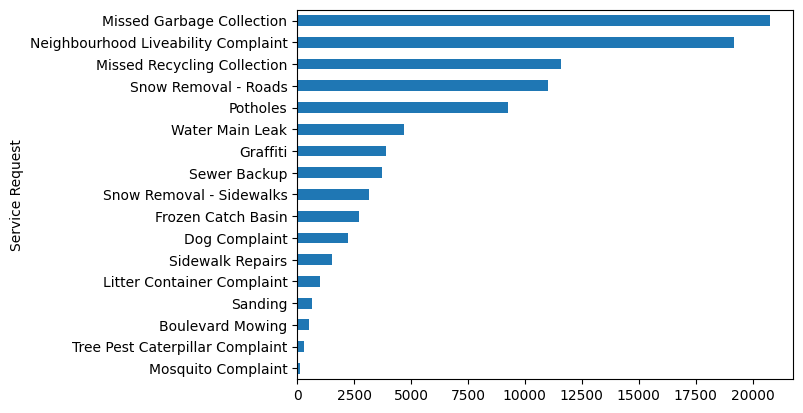

In [8]:
DF.groupby("Service Request").size().sort_values().plot(kind="barh")

### Overall distribution among neighbourhoods

<AxesSubplot: ylabel='Neighbourhood'>

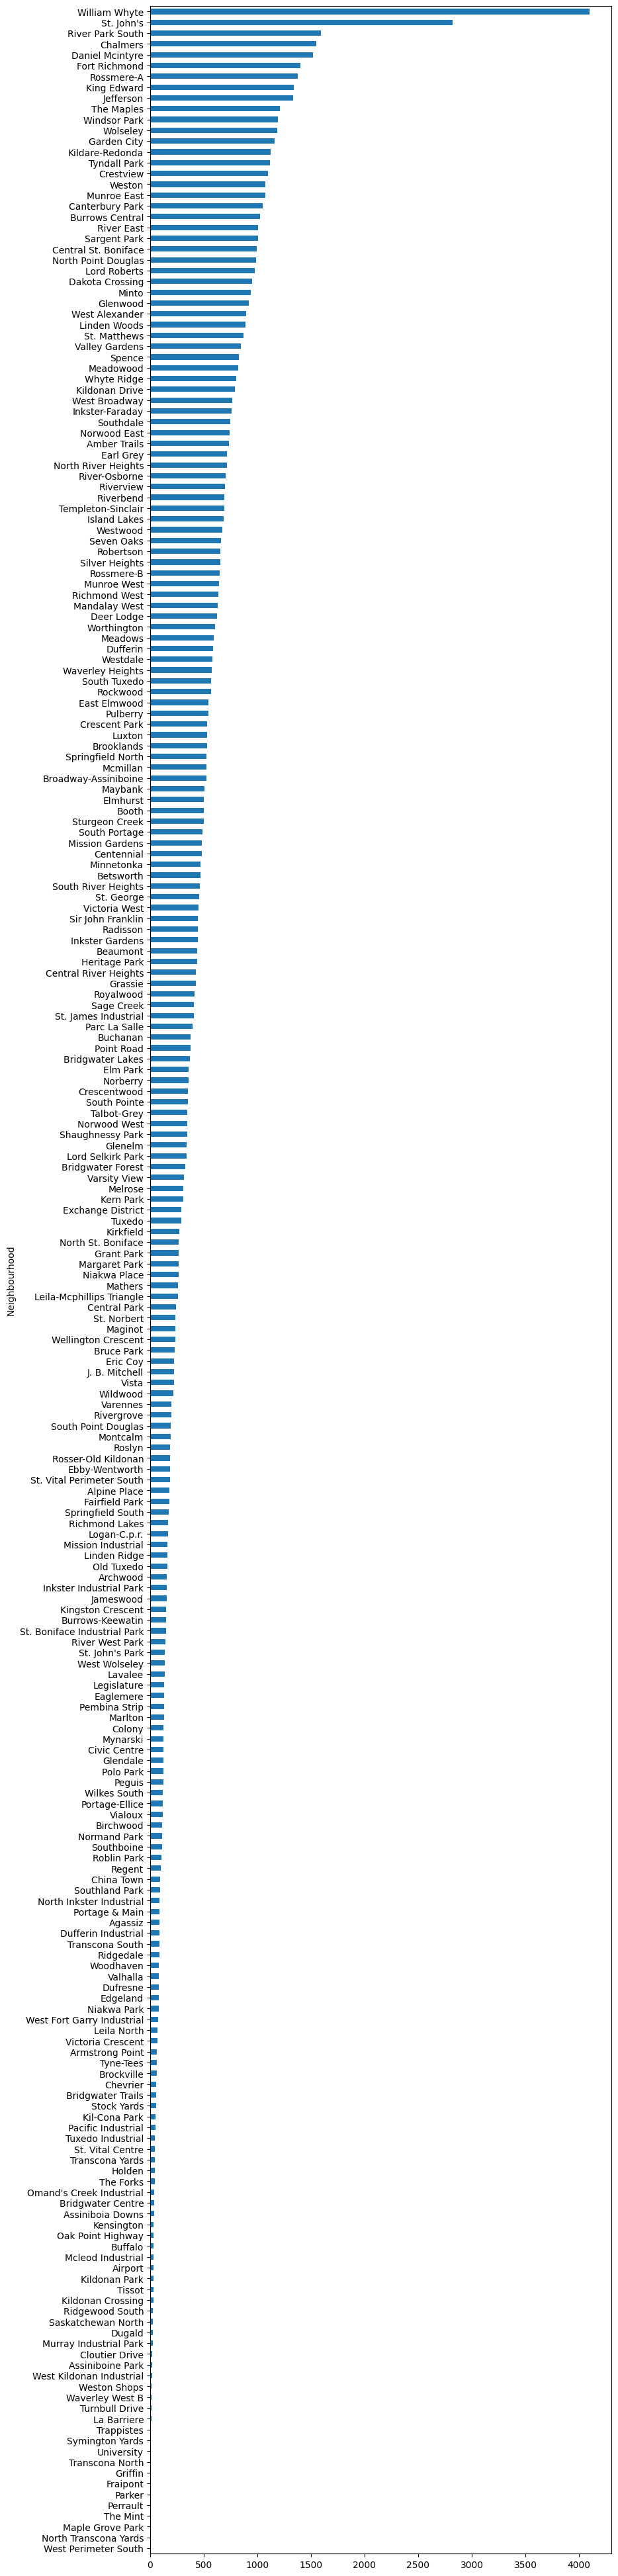

In [9]:
DF.groupby("Neighbourhood").size().sort_values().plot(kind="barh", figsize=(9, 50))

<AxesSubplot: ylabel='Service Request'>

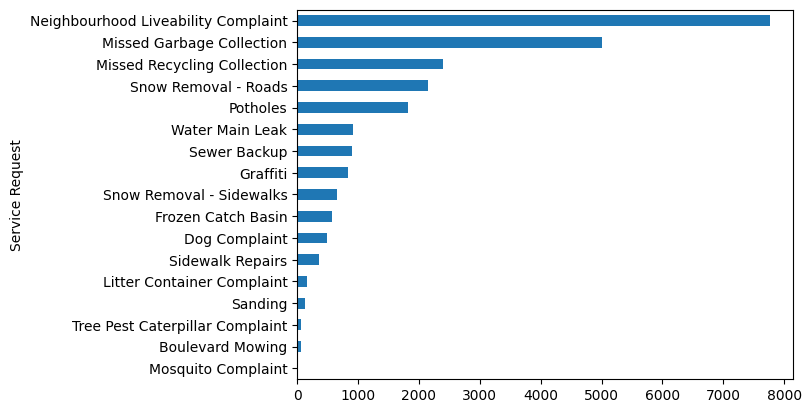

In [35]:
# Bar chart of Service Request for certain neibourhoods
def column_contains(column: str, neighbourhoods: list) -> str:
    ret = ""
    for neighbourhood in neighbourhoods:
        ret += f' or {column}.str.contains("{neighbourhood}", regex=False, na=False)'
    return ret[4:]

def top_n(n: int, group_by: str, ascending = False) -> list:
    return [key for key in DF.groupby(group_by).size().sort_values().nlargest(n).to_dict()] if not ascending else [key for key in DF.groupby(group_by).size().sort_values().nsmallest(n).to_dict()]

DF.query(column_contains("Neighbourhood", top_n(15, "Neighbourhood"))).groupby("Service Request").size().sort_values().plot(kind="barh")


Maybe these downtown hoods are closer to waste station? 

<AxesSubplot: ylabel='Service Request'>

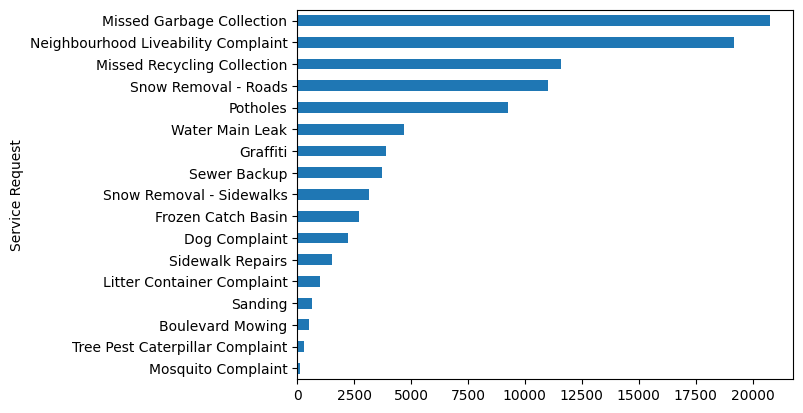

In [ ]:
DF.groupby("Service Request").size().sort_values().plot(kind="barh")